# Classificateur par Réseaux de Neurones Feedforward et Récurrents

In [151]:
from dataset import load_dataset, preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout, Input, SimpleRNN, BatchNormalization, Masking
nltk.download('stopwords')
nltk.download('wordnet') 
sns.set_theme()
from transformers import GPT2Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matisbraun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matisbraun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Chargement du jeu de données

In [3]:
dataset = load_dataset()
dataset = preprocess(dataset)
dataset.head()

,Title,Genre,Plot
6,The Great Train Robbery,western,The film opens with two bandits breaking into ...
7,The Suburbanite,comedy,The film is about a family who move to the sub...
11,From Leadville to Aspen: A Hold-Up in the Rockies,crime,The film features a train traveling through th...
14,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...
15,Laughing Gas,comedy,The plot is that of a black woman going to the...


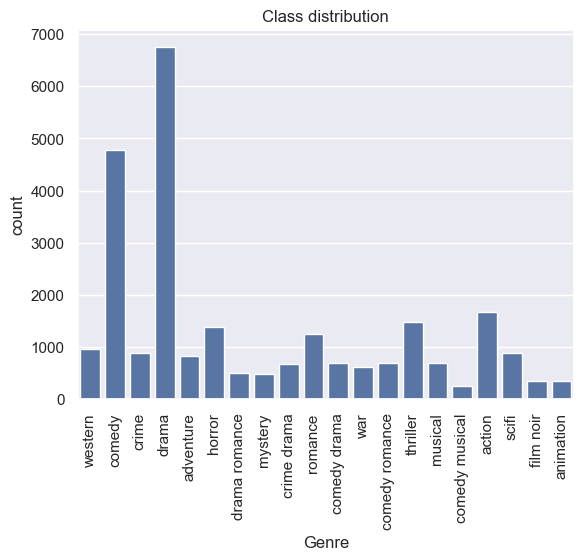

In [4]:
sns.countplot(x='Genre', data=dataset)
plt.title("Class distribution")
plt.xticks(rotation=90)
plt.show()

## Division du jeu de données

In [102]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    return text

dataset['Plot'] = dataset['Plot'].apply(preprocess_text)

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(dataset['Plot'])
X = tokenizer2.texts_to_sequences(dataset['Plot'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Genre'])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
print(f"Train: {len(X_train)}")
print(f"Test:  {len(X_test)}")

Train: 20931
Test:  5233


## Itération 1

### Entraînement du modèle

In [105]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer2.word_index)+1, output_dim=50))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.2519 - loss: 2.5828 - val_accuracy: 0.2551 - val_loss: 2.5486
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.2612 - loss: 2.5404 - val_accuracy: 0.2551 - val_loss: 2.5381
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.2591 - loss: 2.5278 - val_accuracy: 0.2551 - val_loss: 2.5333
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.2616 - loss: 2.5205 - val_accuracy: 0.2551 - val_loss: 2.5213
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - accuracy: 0.2580 - loss: 2.5148 - val_accuracy: 0.2549 - val_loss: 2.5147
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.2590 - loss: 2.5004 - val_accuracy: 0.2547 - val_loss: 2.5153
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.2615 - loss: 2.4794 - val_accuracy: 0.2628 - val_loss: 2.4860
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.2704 - loss: 2.4542 - 

### Évaluation du modèle

In [11]:
y_pred = model.predict(X_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2781 - loss: 2.3975
Accuracy: 27.44%


In [30]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
                precision    recall  f1-score   support

        action       0.00      0.00      0.00       328
     adventure       0.00      0.00      0.00       152
     animation       0.00      0.00      0.00        61
        comedy       0.17      0.11      0.14       973
  comedy drama       0.00      0.00      0.00       146
comedy musical       0.00      0.00      0.00        53
comedy romance       0.00      0.00      0.00       153
         crime       0.00      0.00      0.00       188
   crime drama       0.00      0.00      0.00       125
         drama       0.30      0.90      0.45      1335
 drama romance       0.00      0.00      0.00        98
     film noir       0.00      0.00      0.00        69
        horror       0.23      0.17      0.19       284
       musical       0.00      0.00      0.00       133
       mystery       0.00      0.00      0.00        89
       romance       0.00      0.00      0.00       252
      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## Itération 2

Voyons voir en utilisant un meilleur modèle

In [128]:
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer2.word_index)+1, output_dim=100))
#model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [129]:
model2.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 108s 161ms/step - accuracy: 0.2283 - loss: 2.7466 - val_accuracy: 0.2551 - val_loss: 2.5413
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 103s 157ms/step - accuracy: 0.2474 - loss: 2.6053 - val_accuracy: 0.2551 - val_loss: 2.5450
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 103s 158ms/step - accuracy: 0.2461 - loss: 2.5962 - val_accuracy: 0.2551 - val_loss: 2.5433
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 104s 159ms/step - accuracy: 0.2542 - loss: 2.5807 - val_accuracy: 0.2551 - val_loss: 2.5353
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 104s 158ms/step - accuracy: 0.2535 - loss: 2.5708 - val_accuracy: 0.2551 - val_loss: 2.5386


In [131]:
y_pred = model2.predict(X_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


In [132]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2562 - loss: 2.5314
Accuracy: 25.51%


In [133]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))

164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
                precision    recall  f1-score   support

        action       0.00      0.00      0.00       328
     adventure       0.00      0.00      0.00       152
     animation       0.00      0.00      0.00        61
        comedy       0.00      0.00      0.00       973
  comedy drama       0.00      0.00      0.00       146
comedy musical       0.00      0.00      0.00        53
comedy romance       0.00      0.00      0.00       153
         crime       0.00      0.00      0.00       188
   crime drama       0.00      0.00      0.00       125
         drama       0.26      1.00      0.41      1335
 drama romance       0.00      0.00      0.00        98
     film noir       0.00      0.00      0.00        69
        horror       0.00      0.00      0.00       284
       musical       0.00      0.00      0.00       133
       mystery       0.00      0.00      0.00        89
       romance       0.00      0.00      0.00       252
     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## Itération 3

### Voyons voir en utilisant un meilleur tokeniser

In [86]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

def tokenize_plots(plots):
    return tokenizer(plots, padding=True, truncation=True, return_tensors='tf')

tokenized_data = tokenize_plots(dataset['Plot'].tolist())
X = tokenized_data['input_ids'].numpy()
attention_masks = tokenized_data['attention_mask'].numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Genre'])

In [87]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (len(unique_classes) * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(y)
print("Class weights:", class_weights)

Class weights: {0: 0.7805489260143198, 1: 1.579951690821256, 2: 3.7591954022988507, 3: 0.27339602925809825, 4: 1.8877344877344877, 5: 5.1912698412698415, 6: 1.8635327635327634, 7: 1.483219954648526, 8: 1.961319340329835, 9: 0.193836123870203, 10: 2.575196850393701, 11: 3.770028818443804, 12: 0.9507267441860465, 13: 1.8986937590711175, 14: 2.731106471816284, 15: 1.0533011272141708, 16: 1.46494960806271, 17: 0.8827260458839407, 18: 2.137581699346405, 19: 1.371278825995807}


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_attention_masks, test_attention_masks = train_test_split(attention_masks, test_size=0.2, random_state=42)

In [89]:
input_ids = Input(shape=(X.shape[1],), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(X.shape[1],), dtype=tf.int32, name='attention_mask')

embedding_layer = tf.keras.layers.Embedding(input_dim=50257, output_dim=768)(input_ids)
#flatten_layer = GlobalAveragePooling1D()(embedding_layer)
#dense_layer = Dense(50, activation='relu')(flatten_layer)
#output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dense_layer)
flatten_layer = GlobalAveragePooling1D()(embedding_layer)
dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
dropout_1 = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(128, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_layer_2)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_2)

model3 = Model(inputs=[input_ids, attention_mask], outputs=output_layer)

In [90]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
model3.fit([X_train, train_attention_masks], y_train, epochs=2, batch_size=32, validation_data=([X_test, test_attention_masks], y_test))

Epoch 1/2
655/655 ━━━━━━━━━━━━━━━━━━━━ 269s 411ms/step - accuracy: 0.4857 - loss: 1.6868 - val_accuracy: 0.3845 - val_loss: 2.3408
Epoch 2/2
655/655 ━━━━━━━━━━━━━━━━━━━━ 267s 407ms/step - accuracy: 0.4975 - loss: 1.6432 - val_accuracy: 0.3736 - val_loss: 2.4105


### Évaluation du modèle

In [135]:
loss, accuracy = model3.evaluate([X_test, test_attention_masks], y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

164/164 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.2535 - loss: 2.6835
Accuracy: 25.32%


In [136]:
y_pred = model3.predict([X_test, test_attention_masks])
y_pred_classes = np.argmax(y_pred, axis=1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 28s 168ms/step


In [99]:
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                precision    recall  f1-score   support

        action       0.29      0.45      0.35       328
     adventure       0.18      0.12      0.14       152
     animation       0.49      0.38      0.43        61
        comedy       0.34      0.79      0.48       973
  comedy drama       0.00      0.00      0.00       146
comedy musical       0.00      0.00      0.00        53
comedy romance       0.15      0.03      0.05       153
         crime       0.11      0.01      0.02       188
   crime drama       0.26      0.11      0.16       125
         drama       0.41      0.42      0.41      1335
 drama romance       0.00      0.00      0.00        98
     film noir       0.33      0.01      0.03        69
        horror       0.68      0.36      0.47       284
       musical       0.25      0.02      0.03       133
       mystery       0.00      0.00      0.00        89
       romance       0.39      0.17      0.23       252
         scifi       0.58      0.43      0.49  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

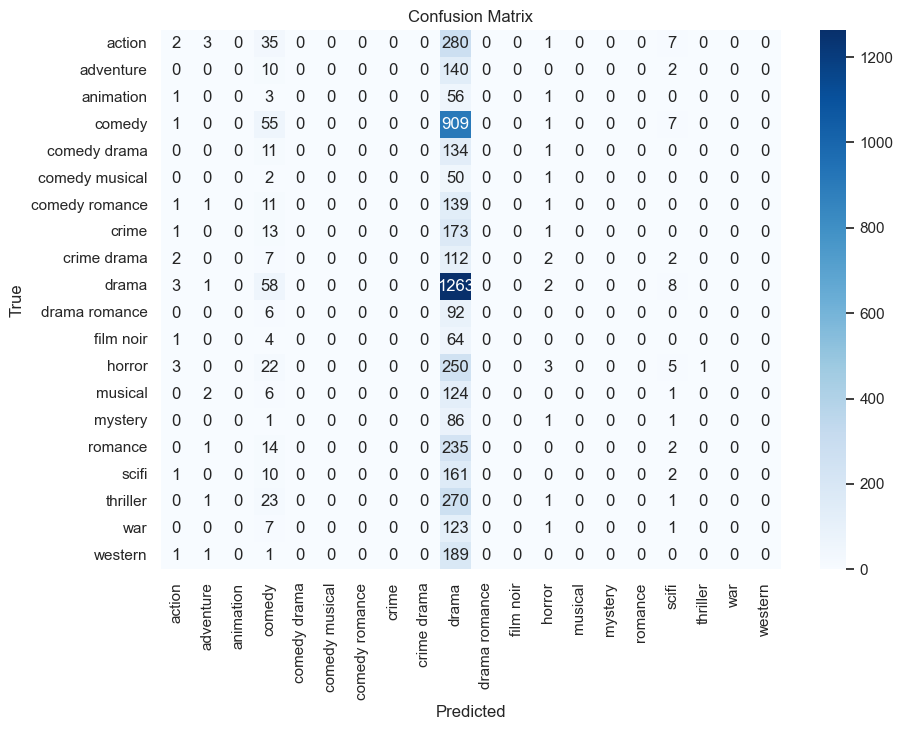

In [137]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Réseau de neurones récurrents

In [140]:
tokenizer4 = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer4.add_special_tokens({'pad_token': '[PAD]'})

def tokenize_plots(plots):
    return tokenizer(plots, padding=True, truncation=True, return_tensors='tf')

tokenized_data4 = tokenize_plots(dataset['Plot'].tolist())
X4 = tokenized_data['input_ids'].numpy()
attention_masks4 = tokenized_data['attention_mask'].numpy()

label_encoder4 = LabelEncoder()
y4 = label_encoder.fit_transform(dataset['Genre'])

In [141]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)
train_attention_masks4, test_attention_masks4 = train_test_split(attention_masks4, test_size=0.2, random_state=42)

In [166]:
input_ids4 = Input(shape=(X4.shape[1],), dtype=tf.int32, name='input_ids')
attention_mask4 = Input(shape=(X4.shape[1],), dtype=tf.int32, name='attention_mask')

embedding_layer4 = tf.keras.layers.Embedding(input_dim=50257, output_dim=768)(input_ids4)
masked_layer4 = Masking(mask_value=0)(embedding_layer4)
rnn_layer4 = SimpleRNN(128, return_sequences=False)(masked_layer4)
dropout_layer4 = Dropout(0.5)(rnn_layer4)
batch_norm_layer4 = BatchNormalization()(dropout_layer4)
dense_layer4 = Dense(64, activation='relu')(batch_norm_layer4)
dropout_layer42 = Dropout(0.5)(dense_layer4)
batch_norm_layer42 = BatchNormalization()(dropout_layer42)
output_layer4 = Dense(len(label_encoder.classes_), activation='softmax')(batch_norm_layer42)

model4 = Model(inputs=[input_ids4, attention_mask4], outputs=output_layer4)

In [167]:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [168]:
model4.fit([X_train4, train_attention_masks4], y_train4, epochs=2, batch_size=32, validation_data=([X_test4, test_attention_masks4], y_test4))

Epoch 1/2
655/655 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.1135 - loss: 3.1996 - val_accuracy: 0.2551 - val_loss: 2.5426
Epoch 2/2
655/655 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.2436 - loss: 2.6249 - val_accuracy: 0.2551 - val_loss: 2.5468


In [169]:
loss4, accuracy4 = model4.evaluate([X_test4, test_attention_masks4], y_test4)
print(f'Accuracy: {accuracy*100:.2f}%')

164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 307ms/step - accuracy: 0.2562 - loss: 2.5375
Accuracy: 25.32%


In [170]:
y_pred4 = model4.predict([X_test4, test_attention_masks4])
y_pred_classes4 = np.argmax(y_pred4, axis=1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 309ms/step


In [171]:
class_names = label_encoder.classes_
print(classification_report(y_test4, y_pred_classes4, target_names=class_names))

                precision    recall  f1-score   support

        action       0.00      0.00      0.00       328
     adventure       0.00      0.00      0.00       152
     animation       0.00      0.00      0.00        61
        comedy       0.00      0.00      0.00       973
  comedy drama       0.00      0.00      0.00       146
comedy musical       0.00      0.00      0.00        53
comedy romance       0.00      0.00      0.00       153
         crime       0.00      0.00      0.00       188
   crime drama       0.00      0.00      0.00       125
         drama       0.26      1.00      0.41      1335
 drama romance       0.00      0.00      0.00        98
     film noir       0.00      0.00      0.00        69
        horror       0.00      0.00      0.00       284
       musical       0.00      0.00      0.00       133
       mystery       0.00      0.00      0.00        89
       romance       0.00      0.00      0.00       252
         scifi       0.00      0.00      0.00  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

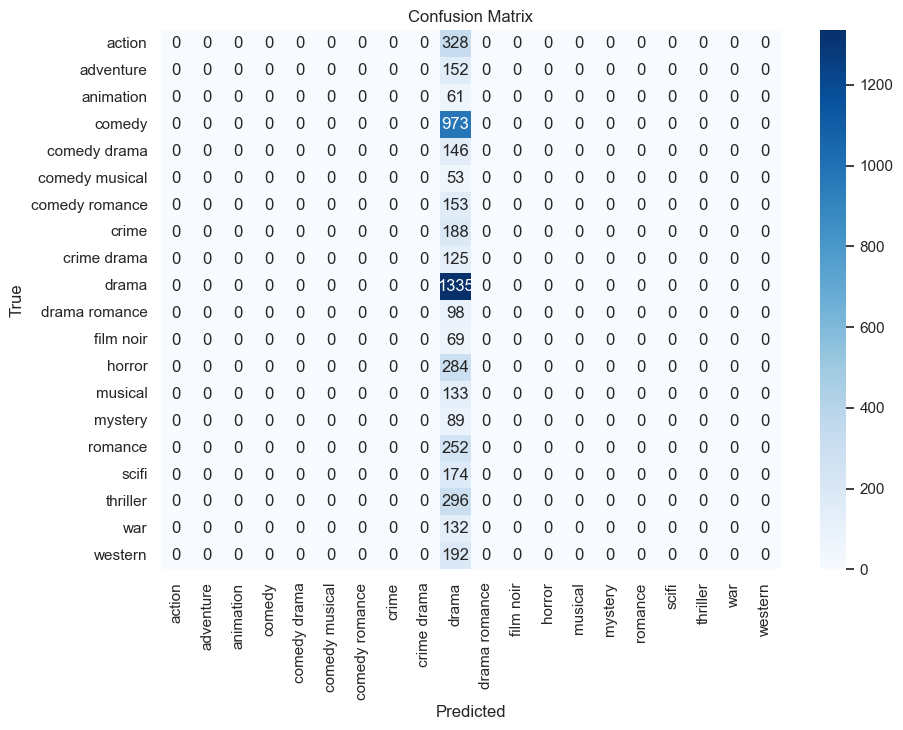

In [172]:
conf_matrix = confusion_matrix(y_test4, y_pred_classes4)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()